In [1]:
%mavenRepo clojars https://clojars.org/repo/
%maven origami:origami:4.1.1-9-SNAPSHOT

import org.opencv.core.*;
import org.opencv.imgcodecs.Imgcodecs;
import org.opencv.imgproc.Imgproc;
import java.io.IOException;
import origami.Origami;
Origami.init();

Loaded:opencv_java411


In [2]:

int d = 13;
int sigmaColor = d;
int sigmaSpace = 7;
int ksize = 7;

double maxValue = 255;
int blockSize = 9;
int C = 2;

Mat cartoon(Mat inputFrame) {
    Mat gray = new Mat();
    Mat co = new Mat();
    Mat mOutputFrame = new Mat();

    Imgproc.cvtColor(inputFrame, co, Imgproc.COLOR_BGR2GRAY);
    Imgproc.bilateralFilter(co, gray, d, sigmaColor, sigmaSpace);
    Imgproc.medianBlur(gray, gray, ksize);
    Imgproc.adaptiveThreshold(gray, gray, maxValue, Imgproc.ADAPTIVE_THRESH_MEAN_C, Imgproc.THRESH_BINARY,
            blockSize, C);
    Mat m = new Mat();
    Imgproc.cvtColor(gray, m, Imgproc.COLOR_GRAY2BGR);
    Core.bitwise_and(inputFrame, m, mOutputFrame);
    return mOutputFrame;
}

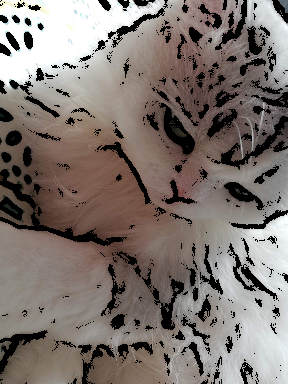

In [3]:
String url = "https://raw.githubusercontent.com/hellonico/opencv4_java_tutorial/master/data/marcel2019.jpg";
Mat marcel = Origami.urlToMat(url);
Mat smallMarcel = Origami.resize(marcel, 6);
Origami.matToBufferedImage(cartoon(smallMarcel));